<a href="https://www.kaggle.com/code/mashallandme/heart-failure-analysis-and-prediction?scriptVersionId=188433122" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
dt = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

As we successfully loaded the data, let's jump into its details.

In [3]:
dt.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dataset comprises 12 features, with 'HeartDisease' serving as the dependent variable. Among these features, 6 are categorical (including FastingBS) and 5 are numerical. Prior to conducting predictive modeling, it is advantageous to examine the relationship between each feature and the occurrence of heart failure. This analysis provides insights into feature importance, identifying key factors influencing heart failure, and guiding strategies for its prevention and improvement.

**Categorical Features**

<Axes: xlabel='Sex', ylabel='count'>

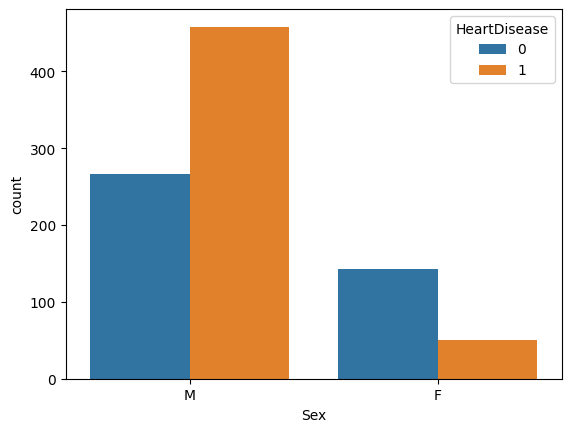

In [5]:
sns.countplot(data=dt, x='Sex', hue='HeartDisease')

<Axes: xlabel='ChestPainType', ylabel='count'>

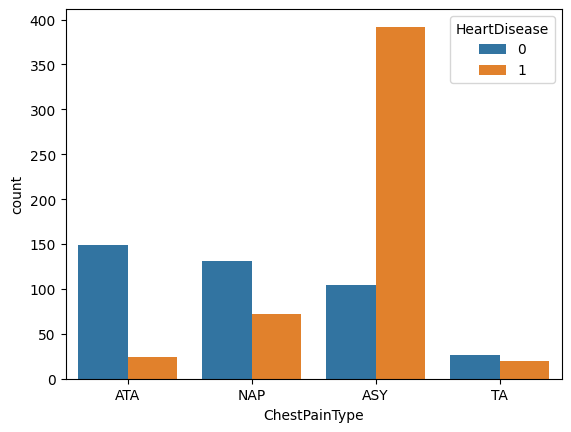

In [6]:
sns.countplot(data=dt, x='ChestPainType', hue='HeartDisease')

<Axes: xlabel='RestingECG', ylabel='count'>

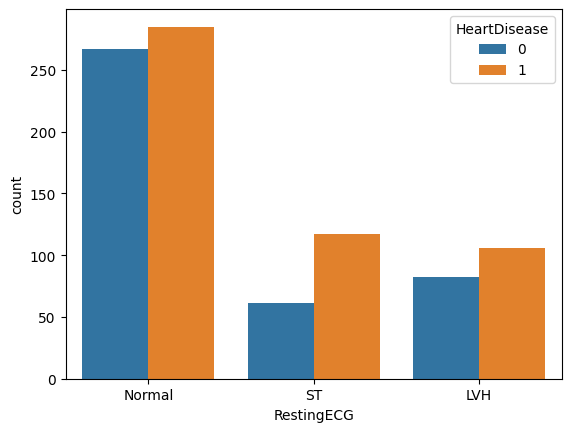

In [7]:
sns.countplot(data=dt, x='RestingECG', hue='HeartDisease')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

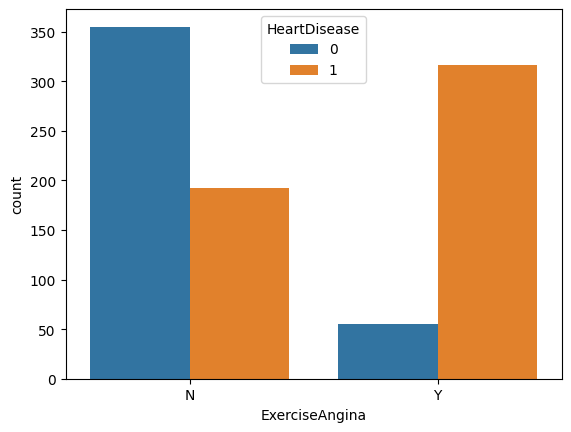

In [8]:
sns.countplot(data=dt, x='ExerciseAngina', hue='HeartDisease')

<Axes: xlabel='ST_Slope', ylabel='count'>

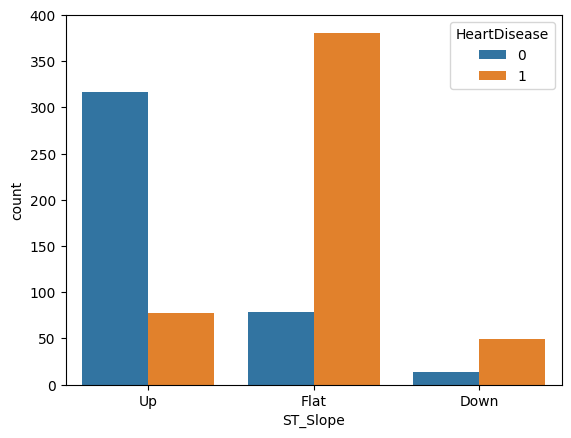

In [9]:
sns.countplot(data=dt, x='ST_Slope', hue='HeartDisease')

<Axes: xlabel='FastingBS', ylabel='count'>

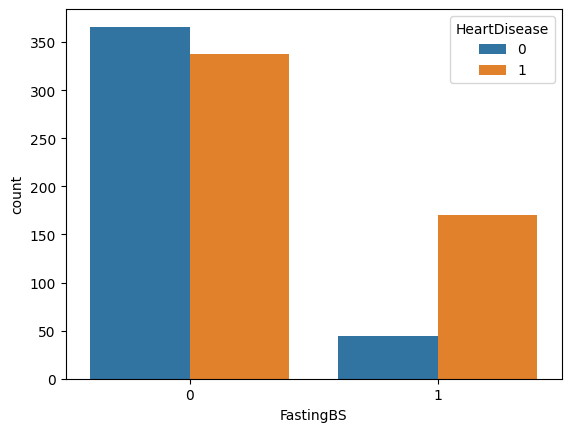

In [10]:
sns.countplot(data=dt, x='FastingBS', hue='HeartDisease')

As observed from the charts above, heart failure disease exhibits a higher frequency among the following groups:

* Males
* Individuals experiencing asymptomatic chest pain
* Individuals with exercise-induced angina
* Individuals displaying a 'Flat' or 'Downsloping' slope of the peak exercise ST segment"
* Individuals showing higher fasting blood sugar level (>120mg/dl)

In the 'RestingECG' feature, each group exhibits more instances of heart failure disease, with a higher frequency notably observed in the groups displaying 'ST-T wave abnormality' and 'probable or definite left ventricular hypertrophy by Estes' criteria'.

**Numerical Features**

In [11]:
dt[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


<Axes: xlabel='HeartDisease', ylabel='Age'>

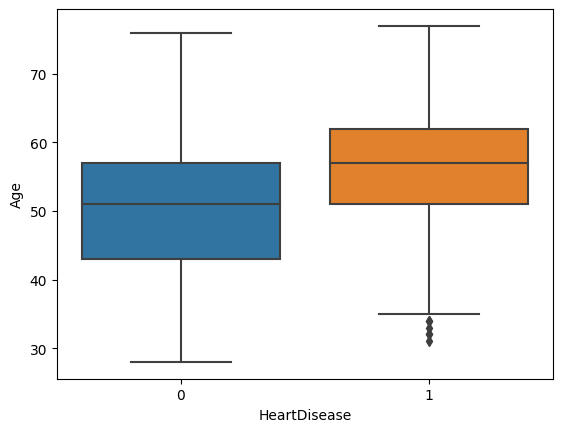

In [12]:
sns.boxplot(data=dt, x='HeartDisease', y='Age')

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

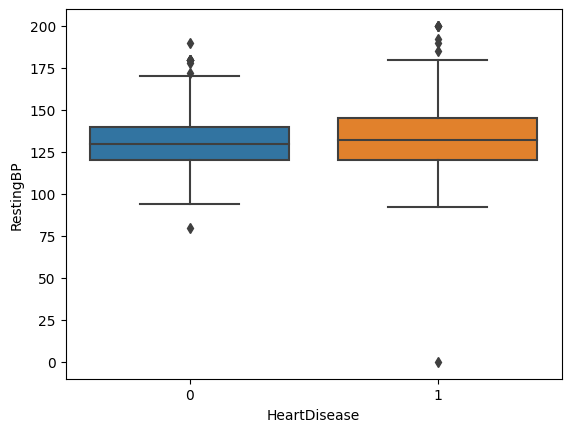

In [13]:
sns.boxplot(data=dt, x='HeartDisease', y='RestingBP')

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

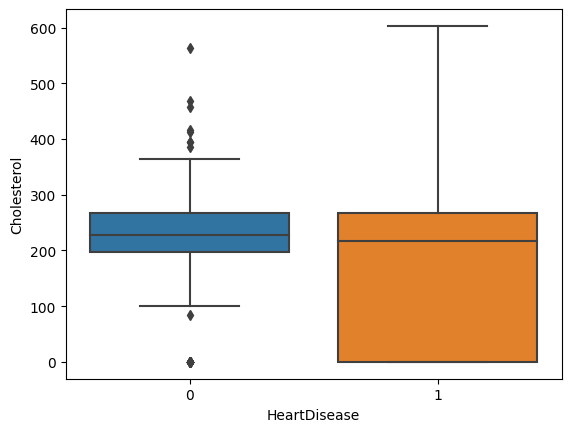

In [14]:
sns.boxplot(data=dt, x='HeartDisease', y='Cholesterol')

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

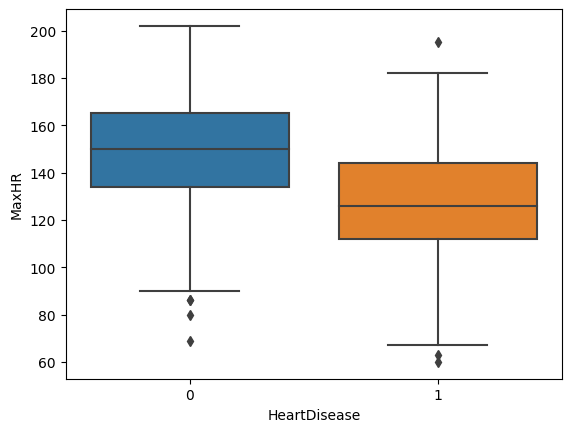

In [15]:
sns.boxplot(data = dt, x='HeartDisease', y='MaxHR')

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

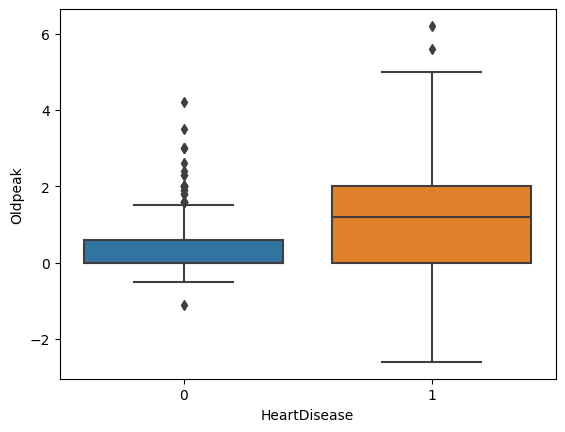

In [16]:
sns.boxplot(data = dt, x='HeartDisease', y = 'Oldpeak')

Significant differences are evident in the features "Age", "maximum heart rate achieved",and "Numeric value measured in depression". For "resting blood pressure", the difference is comparatively smaller. It seems like some data issue exists in the feature "Cholesterol". We need to investigate more closely.

In [17]:
dt[dt["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [18]:
dt['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [19]:
dt[dt["Cholesterol"]==0]['HeartDisease'].value_counts()

HeartDisease
1    152
0     20
Name: count, dtype: int64

172 out of 918 individuals (~19%) wih cholestrol level = 0, and mainly occurs in the group with  heart failures.

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

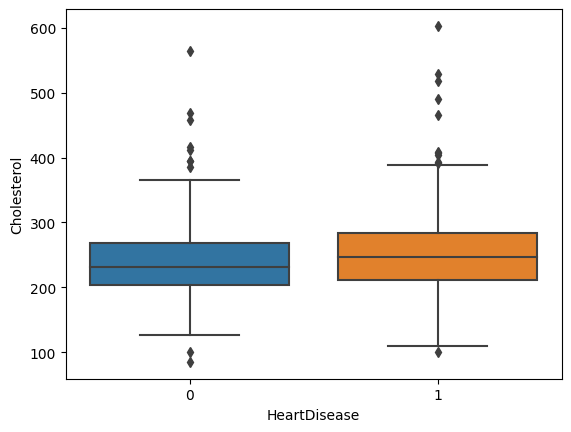

In [20]:
dt1 = dt[dt["Cholesterol"]!=0]
sns.boxplot(data=dt1, x='HeartDisease', y='Cholesterol')

In individuals with non-zero cholesterol levels, the disparity between groups with and without heart failure appears minimal, with a slight elevation observed among those with heart failure. 

Given the insights into the 'Cholesterol' feature, we face a choice: either dropping it from our predictive model or applying imputation techniques to address missing values. For the current exercise, we will use the median value for imputation, and compare the performance of models with and without this feature in subsequent analyses.

Next, let's check the distributions of the continuous features.

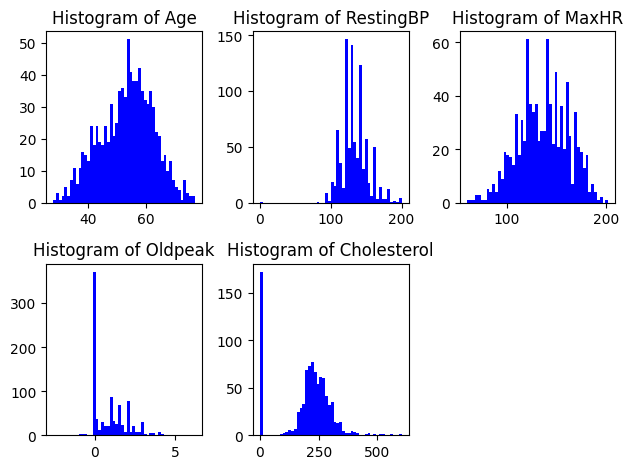

In [21]:
plt.subplot(2,3,1)
plt.hist(dt["Age"],bins=50,color='blue')
plt.title("Histogram of Age")
plt.subplot(2,3,2)
plt.hist(dt["RestingBP"],bins=50,color='blue')
plt.title("Histogram of RestingBP")
plt.subplot(2,3,3)
plt.hist(dt["MaxHR"],bins=50,color='blue')
plt.title("Histogram of MaxHR")
plt.subplot(2,3,4)
plt.hist(dt["Oldpeak"],bins=50,color='blue')
plt.title("Histogram of Oldpeak")
plt.subplot(2,3,5)
plt.hist(dt["Cholesterol"],bins=50,color='blue')
plt.title("Histogram of Cholesterol")
plt.tight_layout()

The distributions of Age, Resting Blood Pressure (RestingBP), and Maximum Heart Rate (MaxHR) exhibit a nearly normal pattern. Despite the presence of missing values in Cholesterol, its distribution also appears to approximate normality. However, the distribution of Oldpeak is notably right-skewed. If using linear models, data transformation is needed for the features Oldpeak. 

**Data Cleaning and Transformation**

In [22]:
cholesterol_median_val = dt[dt["Cholesterol"]!=0]["Cholesterol"].median()
dt['Cholesterol'] = dt['Cholesterol'].replace(0,cholesterol_median_val)

Text(0.5, 1.0, 'Histogram of Cholesterol')

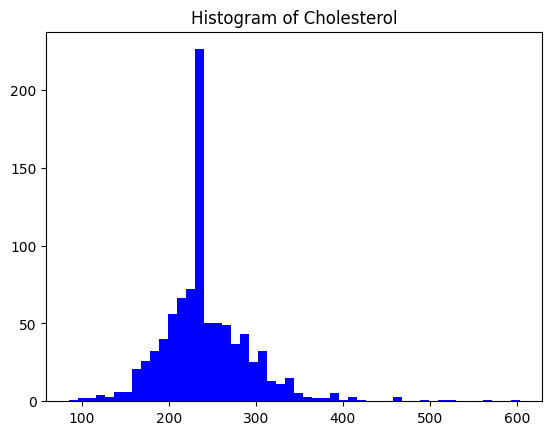

In [23]:
plt.hist(dt["Cholesterol"],bins=50,color='blue')
plt.title("Histogram of Cholesterol")

In [24]:
dt[dt["Oldpeak"]<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,237,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,237,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,237,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,237,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,237,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,237,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,237,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,237,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,237,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,237,1,Normal,72,Y,-0.5,Flat,1


In [25]:
X = dt.iloc[:,:-1]
y = dt["HeartDisease"]

In [26]:
label_encoder = LabelEncoder()
X["Sex"] = label_encoder.fit_transform(X["Sex"])
X["ChestPainType"] = label_encoder.fit_transform(X["ChestPainType"])
X["RestingECG"] = label_encoder.fit_transform(X["RestingECG"])
X["ExerciseAngina"] = label_encoder.fit_transform(X["ExerciseAngina"])
X["ST_Slope"] = label_encoder.fit_transform(X["ST_Slope"])

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Models**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.1)

**Logistic Regression**

In [29]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

<Axes: >

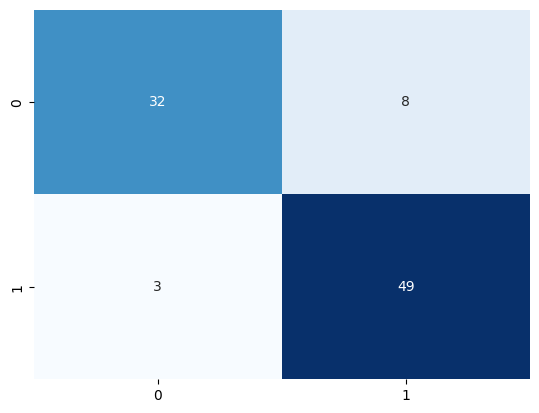

In [30]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

In [31]:
print(lr.score(X_train,y_train))

0.847457627118644


In [32]:
print(lr.score(X_test,y_test))

0.8804347826086957


**Random Forest**

<Axes: >

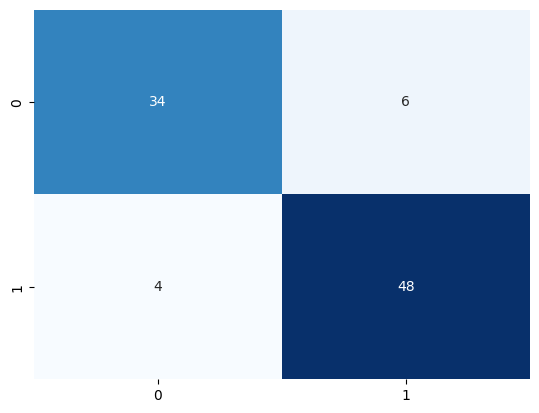

In [33]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

In [34]:
print(rf.score(X_train,y_train))

1.0


In [35]:
print(rf.score(X_test,y_test))

0.8913043478260869


**XGB classifier**

<Axes: >

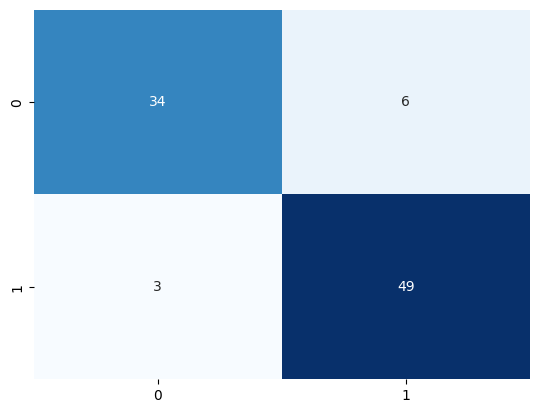

In [36]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

In [37]:
print(xgb.score(X_train,y_train))

1.0


In [38]:
print(xgb.score(X_test,y_test))

0.9021739130434783


**CatBoost**

0:	learn: 0.6841392	total: 63.9ms	remaining: 1m 3s
1:	learn: 0.6744934	total: 71.2ms	remaining: 35.5s
2:	learn: 0.6673018	total: 72.1ms	remaining: 23.9s
3:	learn: 0.6589736	total: 80ms	remaining: 19.9s
4:	learn: 0.6500471	total: 86.9ms	remaining: 17.3s
5:	learn: 0.6419532	total: 92.2ms	remaining: 15.3s
6:	learn: 0.6334563	total: 99.9ms	remaining: 14.2s
7:	learn: 0.6259725	total: 101ms	remaining: 12.6s
8:	learn: 0.6181305	total: 107ms	remaining: 11.8s
9:	learn: 0.6111260	total: 112ms	remaining: 11.1s
10:	learn: 0.6031217	total: 119ms	remaining: 10.7s
11:	learn: 0.5957594	total: 120ms	remaining: 9.86s
12:	learn: 0.5877736	total: 125ms	remaining: 9.5s
13:	learn: 0.5807685	total: 127ms	remaining: 8.96s
14:	learn: 0.5762781	total: 128ms	remaining: 8.42s
15:	learn: 0.5698385	total: 134ms	remaining: 8.22s
16:	learn: 0.5630526	total: 139ms	remaining: 8.05s
17:	learn: 0.5570438	total: 141ms	remaining: 7.69s
18:	learn: 0.5500092	total: 147ms	remaining: 7.61s
19:	learn: 0.5433358	total: 152ms	rem

<Axes: >

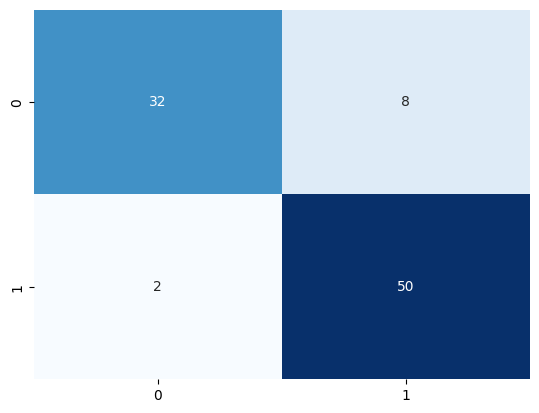

In [39]:
CatBoost = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=10)
CatBoost.fit(X_train, y_train)
y_pred = CatBoost.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

In [40]:
print(CatBoost.score(X_train,y_train))

1.0


In [41]:
print(CatBoost.score(X_test,y_test))

0.8913043478260869
